In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 35)

In [7]:
employee_data = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition (1).csv")

In [8]:
#copying the main employee data to another dataframe
employee_data_new = employee_data.copy()

#dropping the not significant variables
employee_data_new.drop(["EmployeeCount","EmployeeNumber","Gender","HourlyRate","Over18","StandardHours"], axis=1,inplace=True)

#data types of variables
dict(employee_data_new.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'EnvironmentSatisfaction': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsInCurrentRole': dtype('int64'),
 'YearsSinceLastPromotion': dtype('int64'),
 'YearsWithCurrManager': dtype('int64')}

In [9]:
numeric_variable_names  = [key for key in dict(employee_data_new.dtypes) if dict(employee_data_new.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
categorical_variable_names = [key for key in dict(employee_data_new.dtypes) if dict(employee_data_new.dtypes)[key] in ["object"]]

In [10]:
categorical_variable_names

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [11]:
employee_data_num = employee_data_new[numeric_variable_names]

In [12]:
employee_data_cat = employee_data_new[categorical_variable_names]
employee_data_cat.drop(["Attrition"],axis=1,inplace=True)

In [13]:
employee_data_cat = pd.get_dummies(employee_data_cat)

In [14]:
employee_data_final = pd.concat([employee_data_num, employee_data_cat,employee_data_new[["Attrition"]]],axis=1)

In [15]:
employee_data_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,3,2,4,5993,19479,8,11,3,1,0,8,0,...,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,Yes
1,49,279,8,1,3,2,2,2,5130,24907,1,23,4,4,1,10,3,...,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,No
2,37,1373,2,2,4,2,1,3,2090,2396,6,15,3,2,0,7,3,...,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,Yes
3,33,1392,3,4,4,3,1,3,2909,23159,1,11,3,3,0,8,3,...,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,No
4,27,591,2,1,1,3,1,2,3468,16632,9,12,3,4,1,6,3,...,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,No


In [16]:
 features =  list(employee_data_final.columns.difference(["Attrition"]))

In [17]:
plt.style.use("seaborn-v0_8")

In [18]:
employee_data = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition (1).csv")

In [19]:
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [20]:
employee_data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [21]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [22]:
employee_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [23]:
employee_data["left"] = np.where(employee_data["Attrition"] == "Yes",1,0)
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,...,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,...,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,...,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,...,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,...,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


In [24]:
warnings.filterwarnings('ignore')

In [25]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    """A function for plotting the distribution of numerical variables and its effect on attrition"""

    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0], palette={"Yes": "green", "No": "red"}  )
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)

    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)

    plt.show()

In [26]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "left"):

    """A function for Plotting the effect of variables(categorical data) on attrition """

    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))

    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Attrition",ax=ax[0],palette='viridis')
    else:
        sns.countplot(y = segment_by, data=df,hue="Attrition",ax=ax[0],palette='viridis')

    ax[0].set_title("Comparision of " + segment_by + " vs " + "Attrition")

    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None,palette='viridis')
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None,palette='viridis')

    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

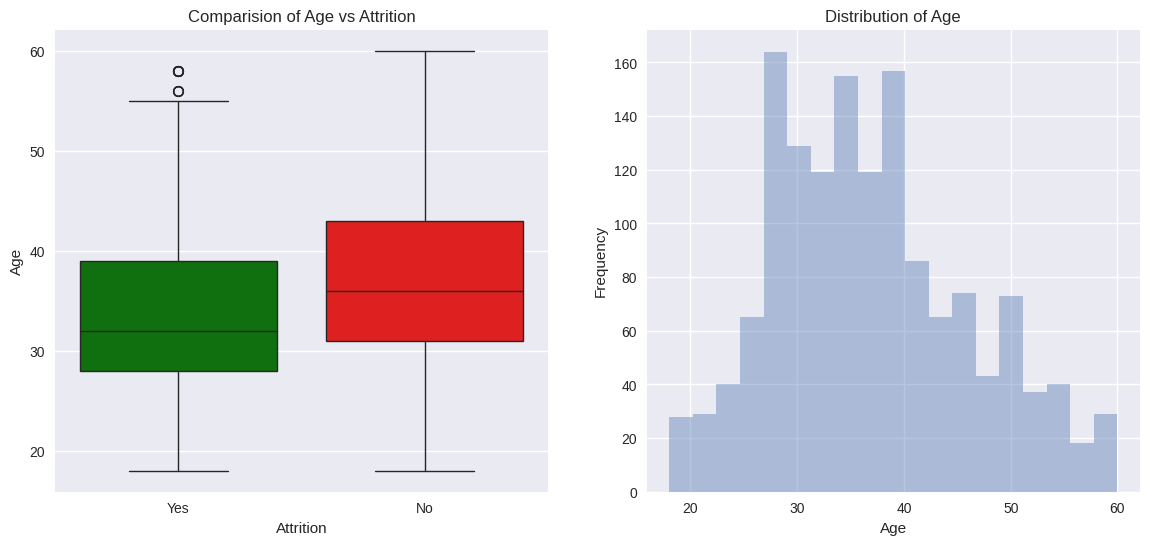

In [27]:
# we are checking the distribution of employee age and its related to attrition or not
NumericalVariables_targetPlots(employee_data,segment_by="Age")

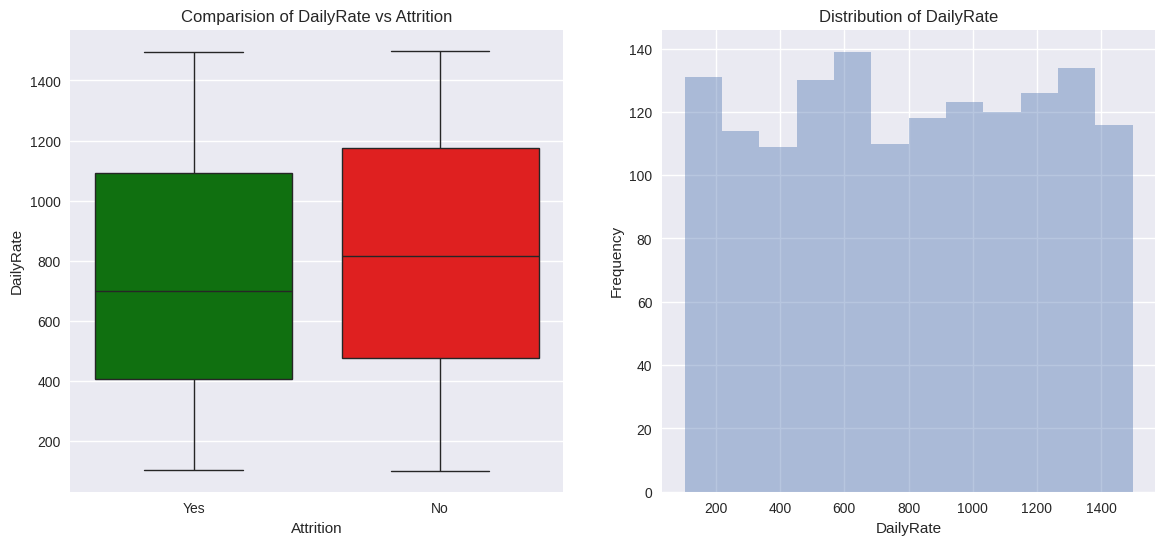

In [28]:
#Analyzing the daily wage rate vs employee left the company or not
NumericalVariables_targetPlots(employee_data, segment_by = "DailyRate")

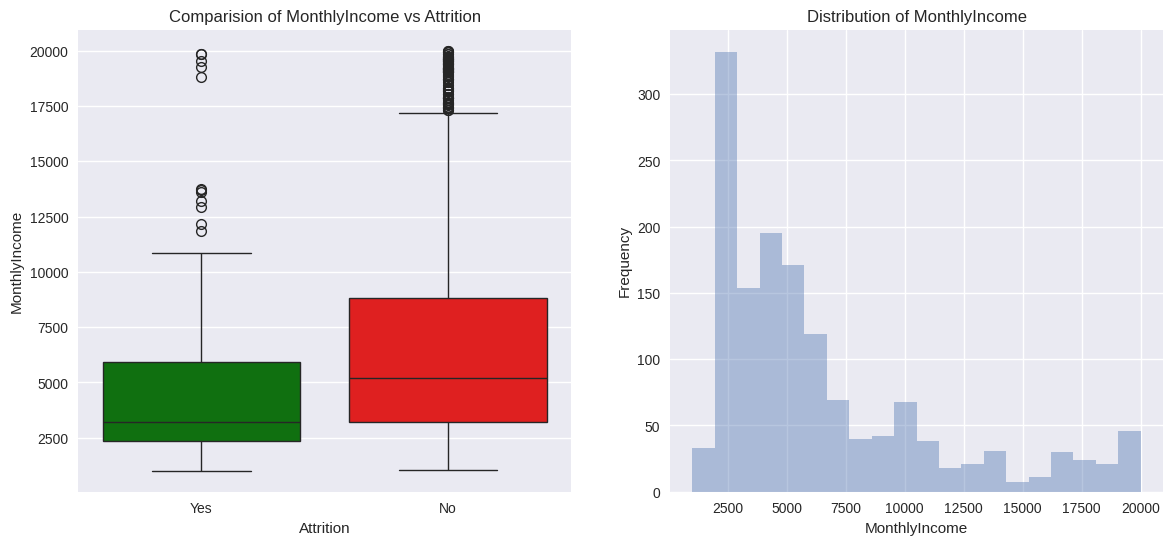

In [29]:
#Analyzing the Monthly Income vs employee left the company or not
NumericalVariables_targetPlots(employee_data, segment_by = "MonthlyIncome")

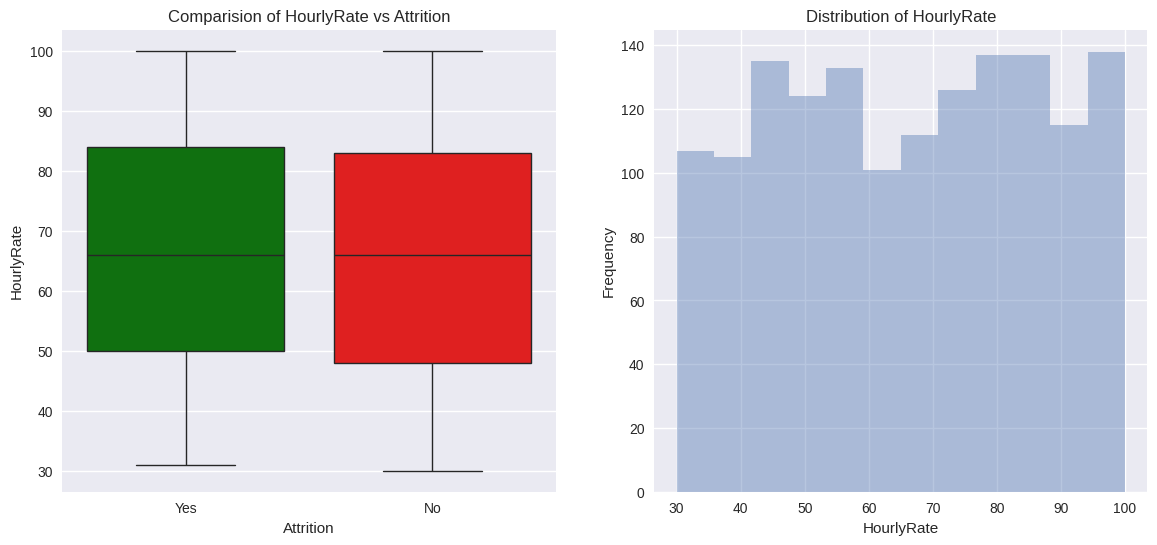

In [30]:
#Analyzing the Hourly Rate vs employee left the company or not
NumericalVariables_targetPlots(employee_data, segment_by = "HourlyRate")

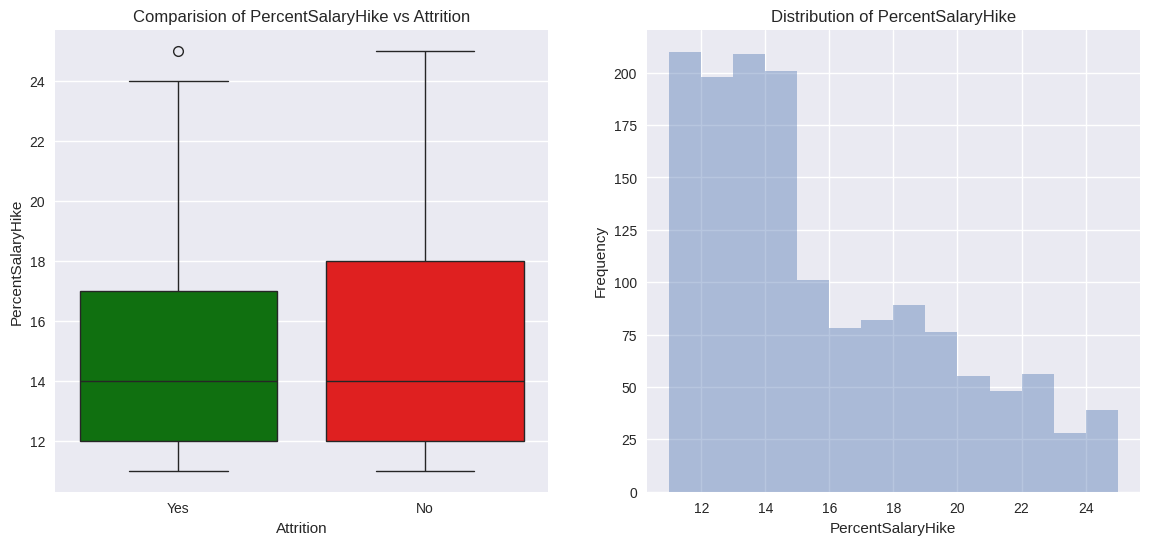

In [31]:
#nAalyzing the PercentSalaryHike vs employee left the company or not
NumericalVariables_targetPlots(employee_data,"PercentSalaryHike")

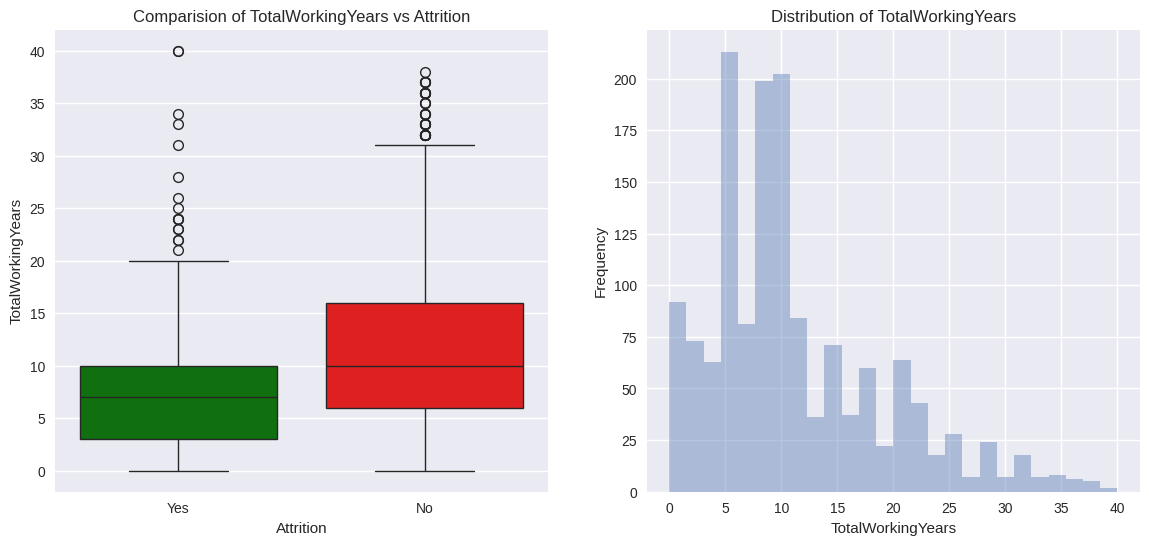

In [32]:
#Aanalyzing the TotalWorkingYears vs employee left the company or not
NumericalVariables_targetPlots(employee_data,"TotalWorkingYears")

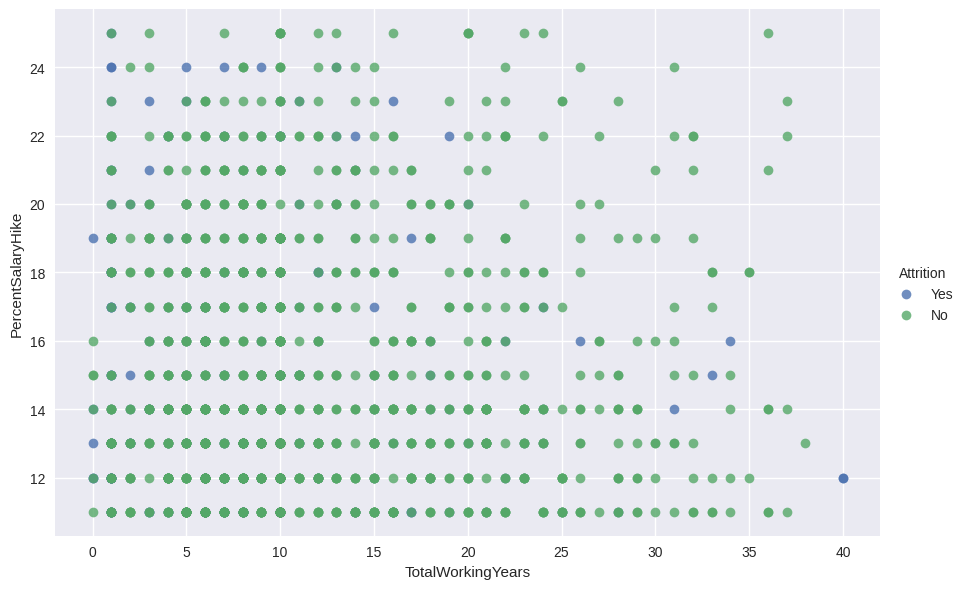

In [33]:
sns.lmplot(x = "TotalWorkingYears", y = "PercentSalaryHike", data=employee_data,fit_reg=False,hue="Attrition",height=6,aspect=1.5)
plt.show()

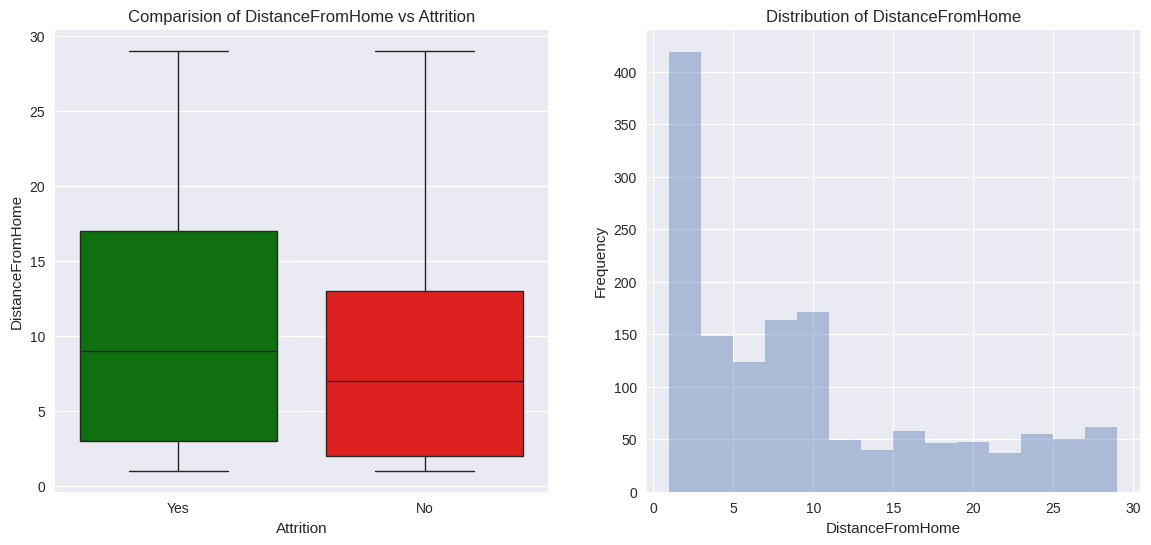

In [34]:
#Aanalyzing the DistanceFromHome vs employee left the company or not
NumericalVariables_targetPlots(employee_data,"DistanceFromHome")

In [35]:
pd.crosstab(employee_data.JobInvolvement,employee_data.Attrition)

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [36]:
round(employee_data.JobInvolvement.value_counts()/employee_data.shape[0] * 100,2)

,count
JobInvolvement,
3,59.05
2,25.51
4,9.80
1,5.65


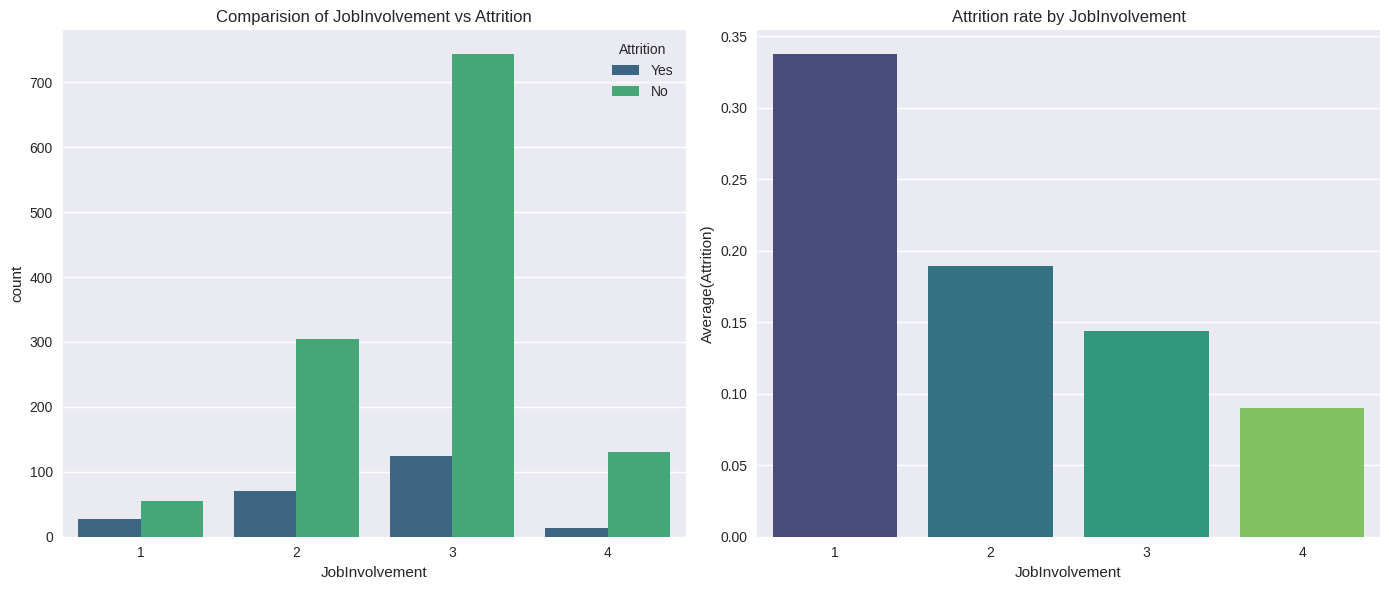

In [37]:
#Comparision of JobInvolvement vs Attrition
CategoricalVariables_targetPlots(employee_data,"JobInvolvement")

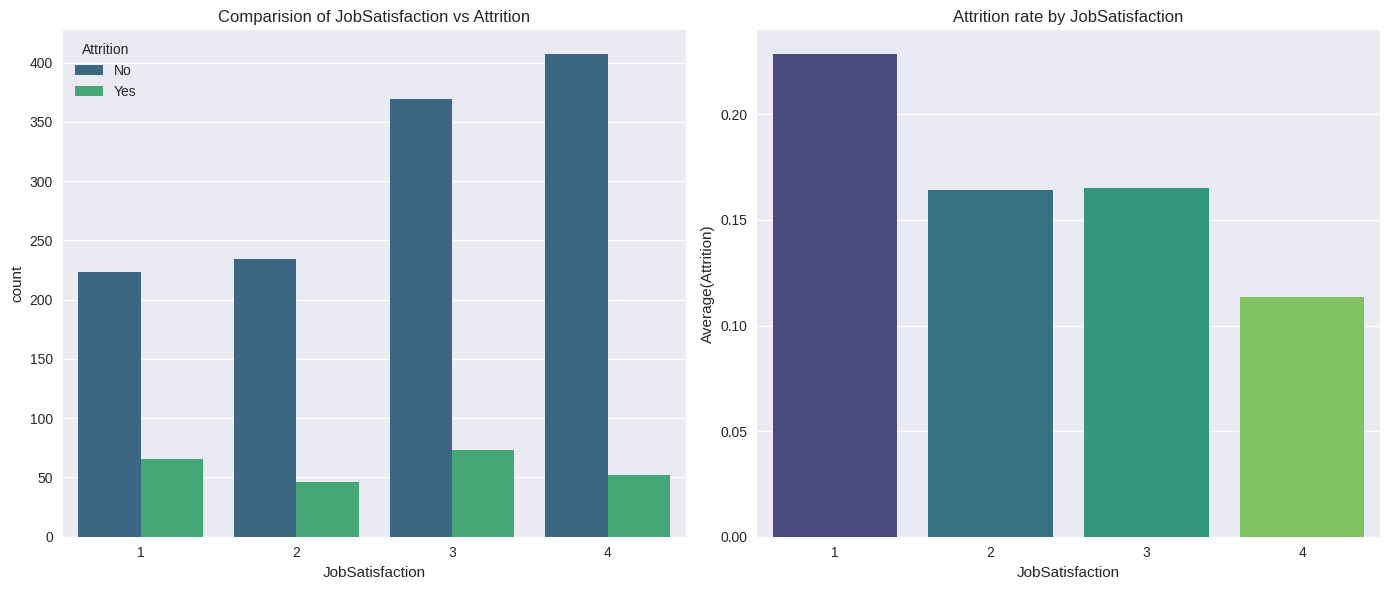

In [38]:
#Comparison of Jobsatisfaction vs Attrition
CategoricalVariables_targetPlots(employee_data,"JobSatisfaction")

In [39]:
#checking the number of categories under performance rating
employee_data.PerformanceRating.value_counts()


,count
PerformanceRating,
3,1244
4,226


In [40]:
round(employee_data.PerformanceRating.value_counts()/employee_data.shape[0] * 100,2)

,count
PerformanceRating,
3,84.63
4,15.37


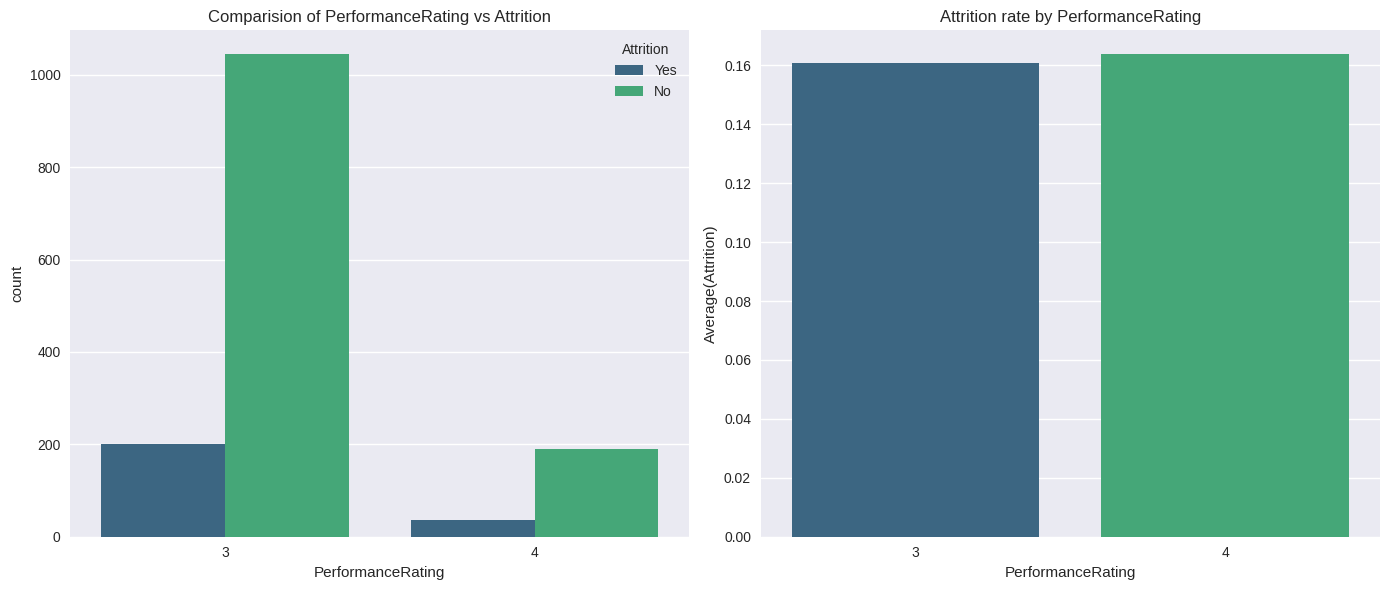

In [41]:
#Comparison of PerformanceRating vs Attrition
CategoricalVariables_targetPlots(employee_data,"PerformanceRating")

In [42]:
#percentage of each relationship satisfaction category across the data
round(employee_data.RelationshipSatisfaction.value_counts()/employee_data.shape[0],2)

,count
RelationshipSatisfaction,
3,0.31
4,0.29
2,0.21
1,0.19


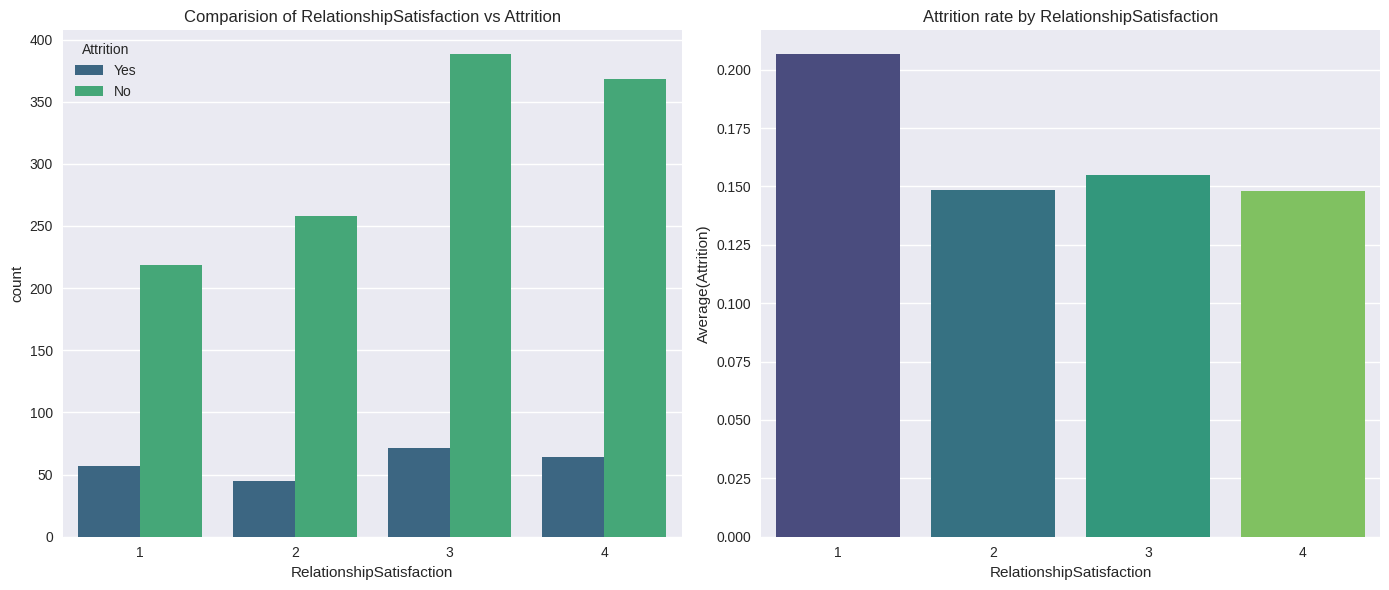

In [43]:
CategoricalVariables_targetPlots(employee_data,"RelationshipSatisfaction")

In [44]:
round(employee_data.WorkLifeBalance.value_counts()/employee_data.shape[0],2)

,count
WorkLifeBalance,
3,0.61
2,0.23
4,0.10
1,0.05


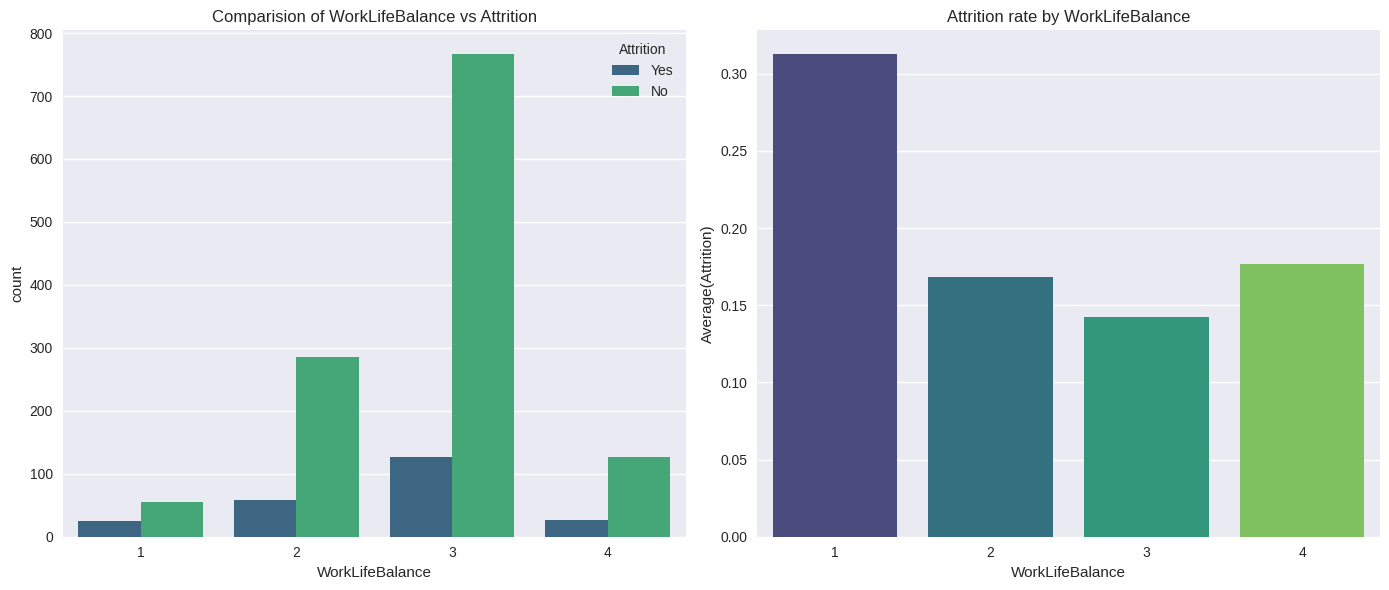

In [45]:
CategoricalVariables_targetPlots(employee_data,"WorkLifeBalance")

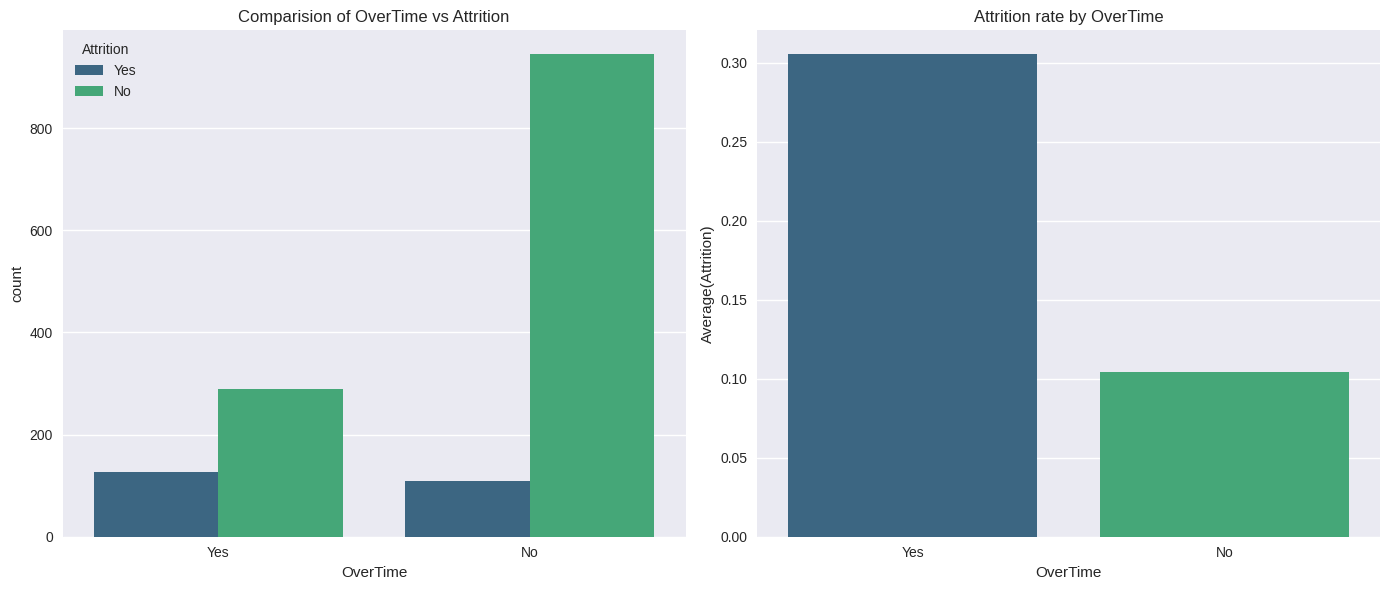

In [46]:
CategoricalVariables_targetPlots(employee_data,"OverTime")

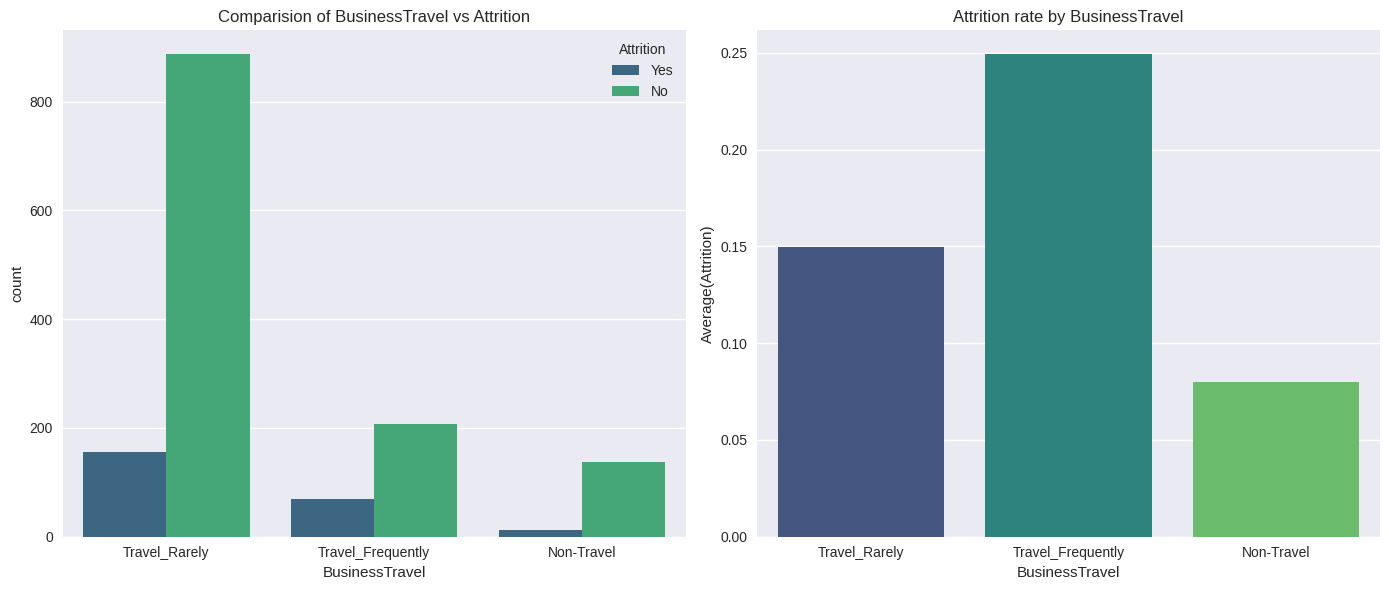

In [47]:
CategoricalVariables_targetPlots(employee_data,segment_by="BusinessTravel")

In [48]:
employee_data.Department.value_counts()

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


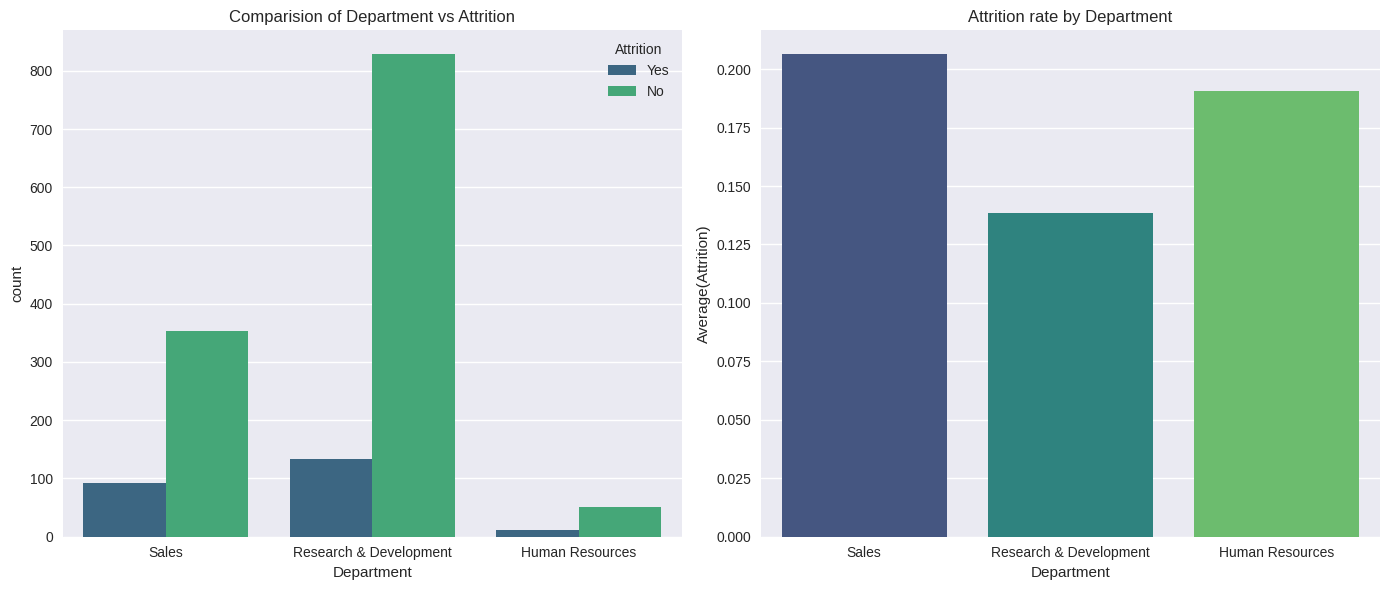

In [49]:
CategoricalVariables_targetPlots(employee_data,segment_by="Department")

In [50]:
employee_data.EducationField.value_counts()

,count
EducationField,
Life Sciences,606
Medical,464
Marketing,159
Technical Degree,132
Other,82
Human Resources,27


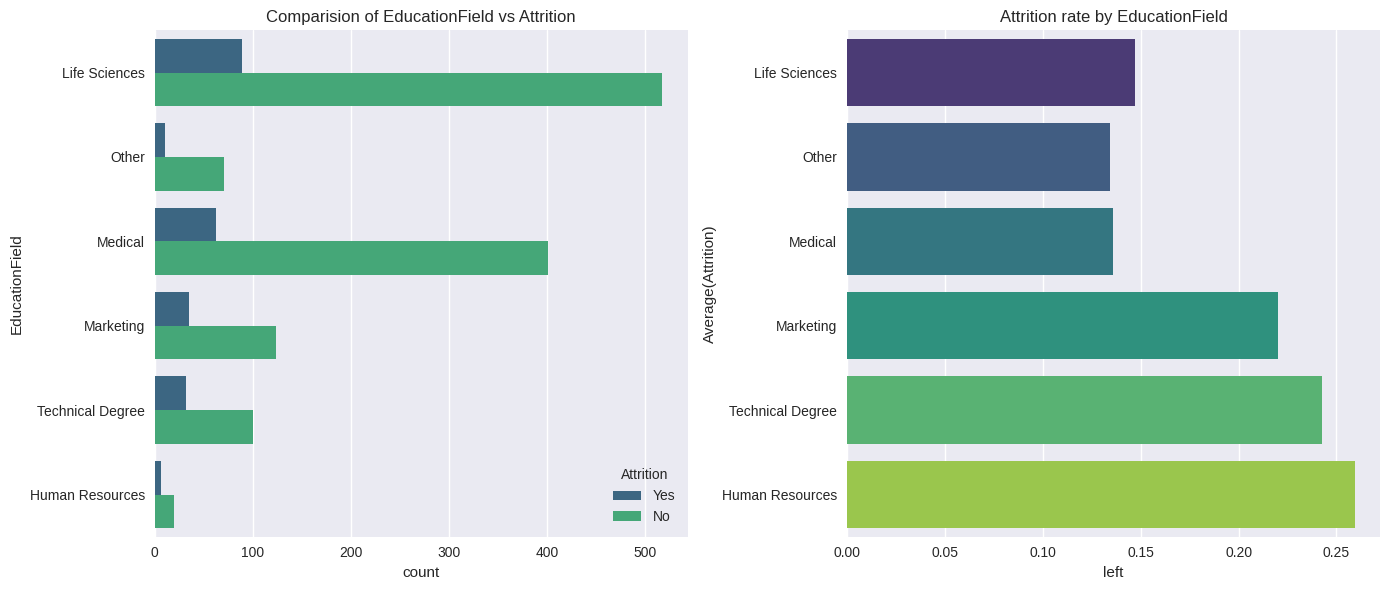

In [51]:
CategoricalVariables_targetPlots(employee_data,"EducationField",invert_axis=True)

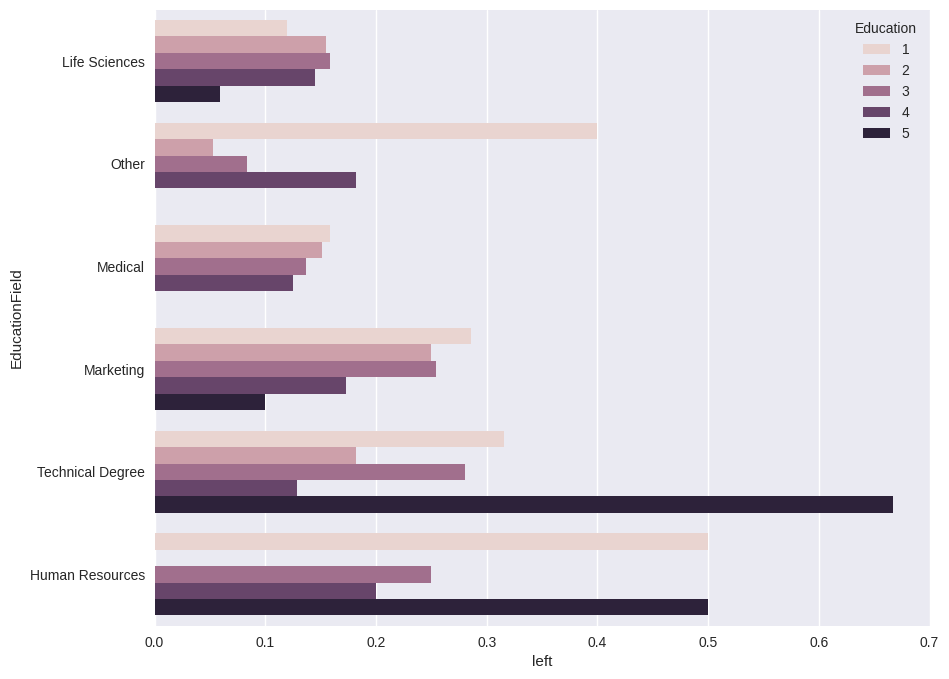

In [52]:
plt.figure(figsize=(10,8))
sns.barplot(y = "EducationField", x = "left", hue="Education", data=employee_data,ci=None)
plt.show()

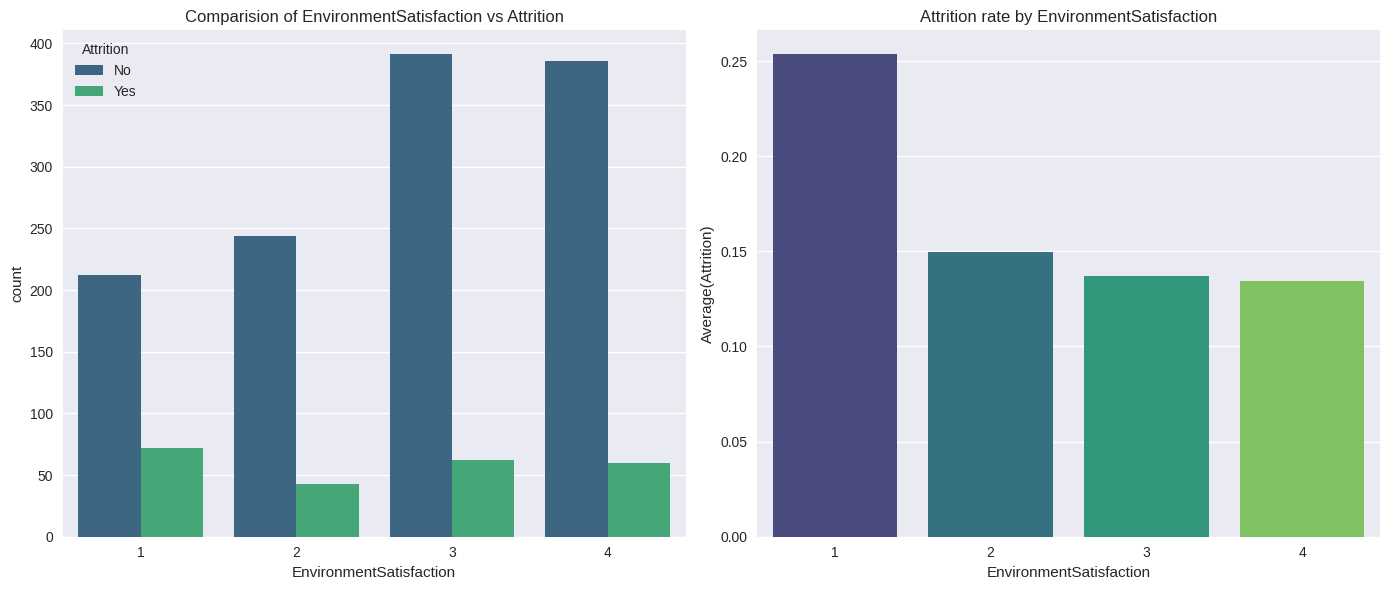

In [53]:
CategoricalVariables_targetPlots(employee_data,"EnvironmentSatisfaction")

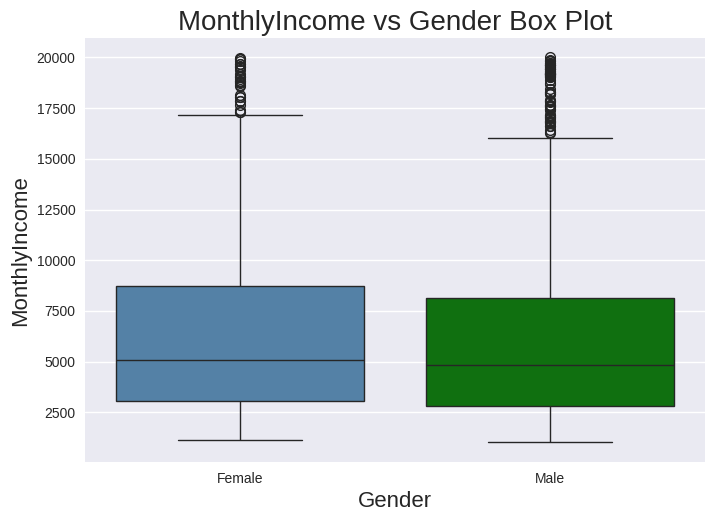

In [54]:
sns.boxplot(x=employee_data['Gender'], y=employee_data['MonthlyIncome'],palette={"Male": "green", "Female": "steelblue"})
plt.title('MonthlyIncome vs Gender Box Plot', fontsize=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('MonthlyIncome', fontsize=16)
plt.show()

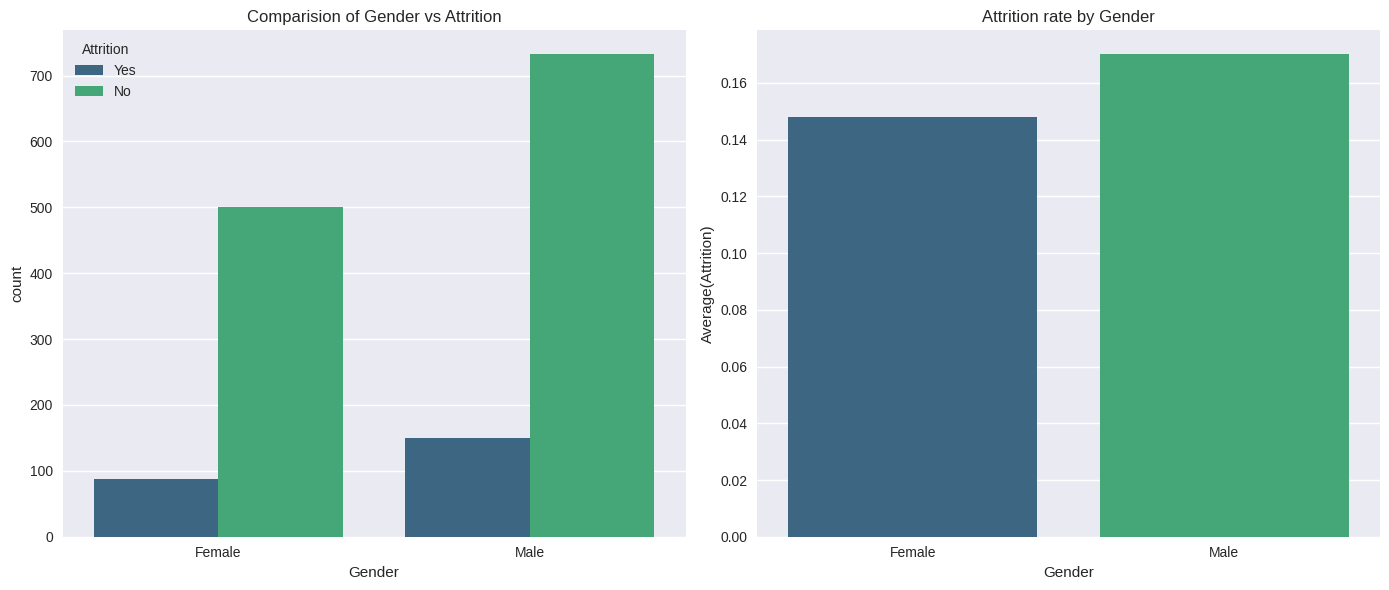

In [55]:
CategoricalVariables_targetPlots(employee_data,"Gender")

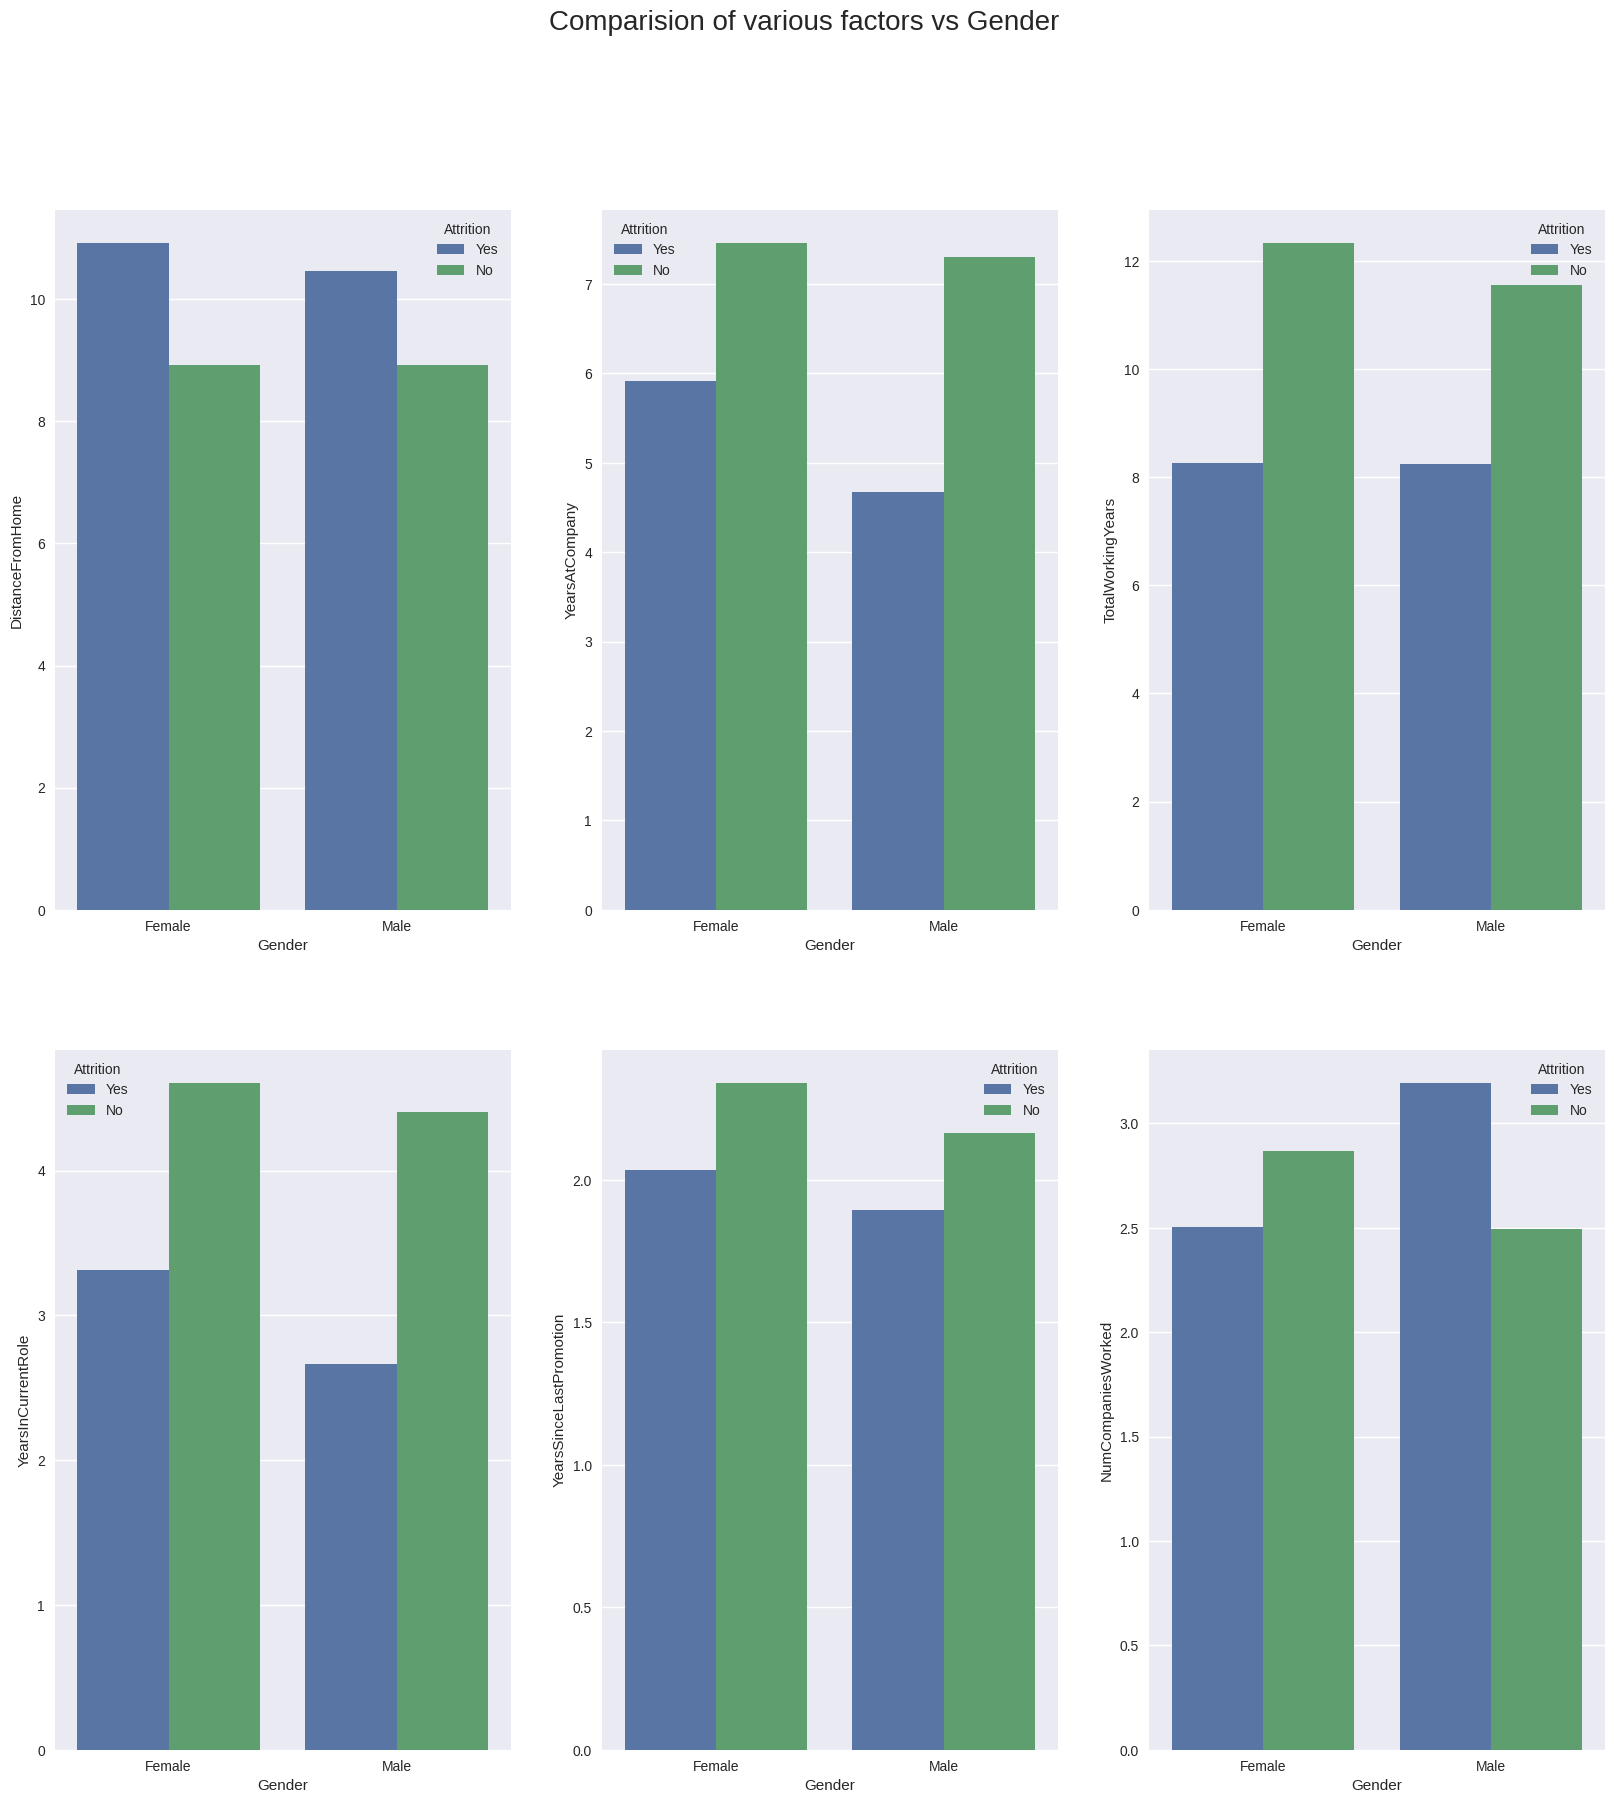

In [56]:
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
sns.barplot(x=employee_data['Gender'],y=employee_data['DistanceFromHome'],hue = employee_data['Attrition'], ax = ax[0,0],ci=None);
sns.barplot(x=employee_data['Gender'],y=employee_data['YearsAtCompany'],hue = employee_data['Attrition'], ax = ax[0,1],ci=None);
sns.barplot(x=employee_data['Gender'],y=employee_data['TotalWorkingYears'],hue = employee_data['Attrition'], ax = ax[0,2],ci=None);
sns.barplot(x=employee_data['Gender'],y=employee_data['YearsInCurrentRole'],hue = employee_data['Attrition'], ax = ax[1,0],ci=None);
sns.barplot(x=employee_data['Gender'],y=employee_data['YearsSinceLastPromotion'],hue = employee_data['Attrition'], ax = ax[1,1],ci=None);
sns.barplot(x=employee_data['Gender'],y=employee_data['NumCompaniesWorked'],hue = employee_data['Attrition'], ax = ax[1,2],ci=None);
plt.show()

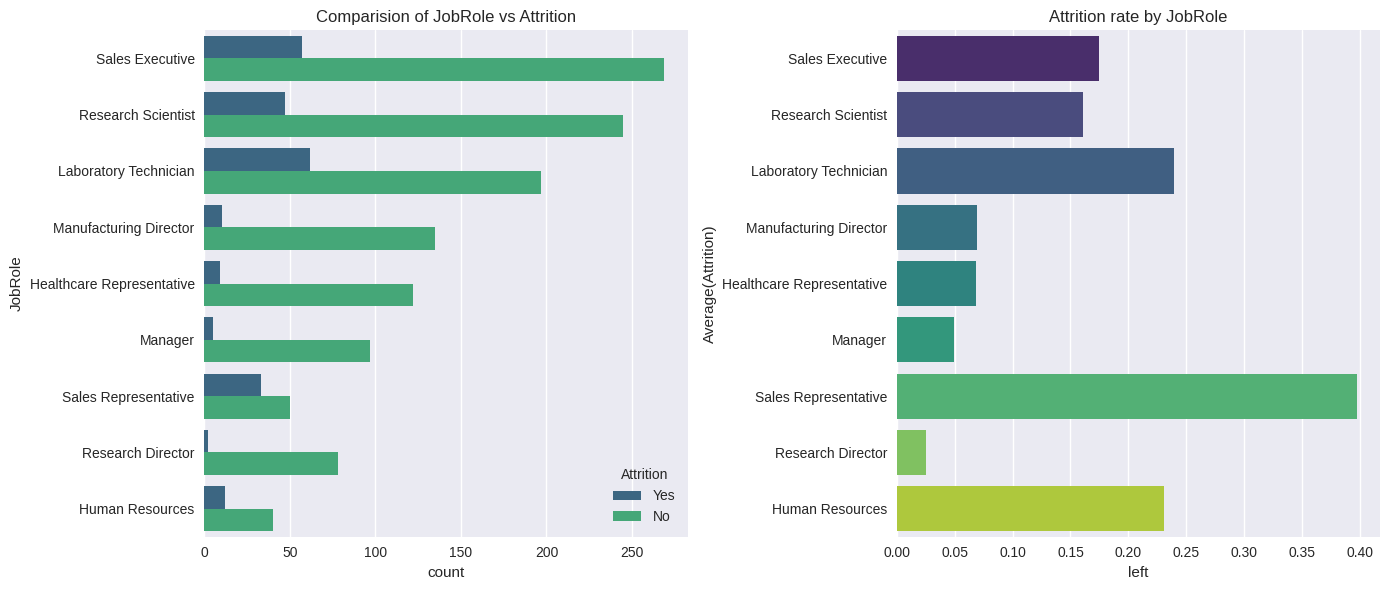

In [57]:
CategoricalVariables_targetPlots(employee_data,"JobRole",invert_axis=True)

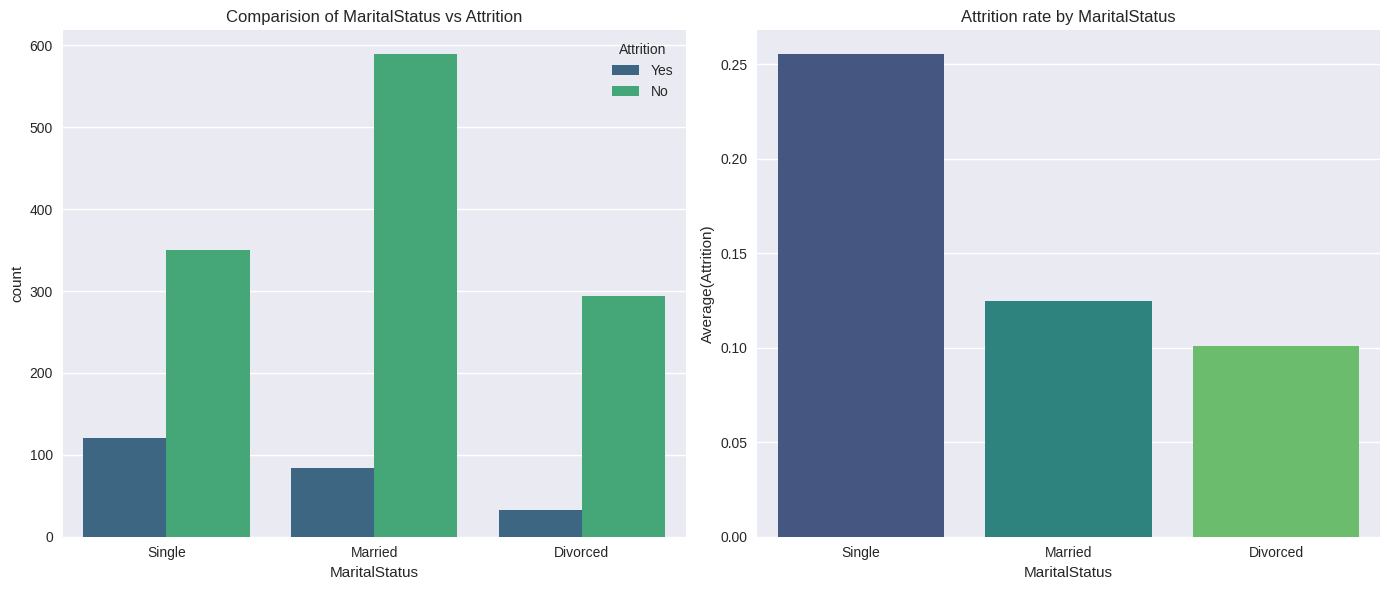

In [58]:
CategoricalVariables_targetPlots(employee_data,"MaritalStatus")

In [59]:
from sklearn.model_selection import train_test_split

#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#to create a confusion matrix
from sklearn.metrics import confusion_matrix

#import whole class of metrics
from sklearn import metrics

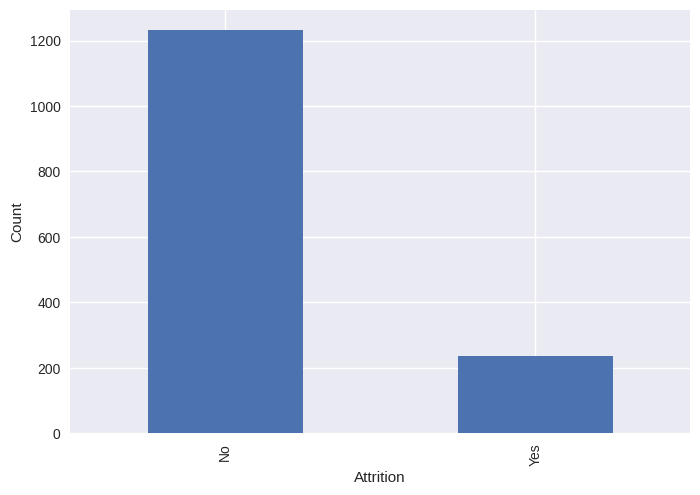

In [60]:
employee_data.Attrition.value_counts().plot(kind = "bar")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

In [61]:
employee_data["Attrition"].value_counts()

,count
Attrition,
No,1233
Yes,237


In [62]:
#copying the main employee data to another dataframe
employee_data_new = employee_data.copy()

In [63]:
#dropping the not significant variables
employee_data_new.drop(["EmployeeCount","EmployeeNumber","Gender","HourlyRate","Over18","StandardHours","left"], axis=1,inplace=True)

In [64]:
#data types of variables
dict(employee_data_new.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'EnvironmentSatisfaction': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsInCurrentRole': dtype('int64'),
 'YearsSinceLastPromotion': dtype('int64'),
 'YearsWithCurrManager': dtype('int64')}

In [65]:
numeric_variable_names  = [key for key in dict(employee_data_new.dtypes) if dict(employee_data_new.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
categorical_variable_names = [key for key in dict(employee_data_new.dtypes) if dict(employee_data_new.dtypes)[key] in ["object"]]

In [66]:
categorical_variable_names

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [67]:
employee_data_num = employee_data_new[numeric_variable_names]

In [68]:
#copying the main employee data to another dataframe
employee_data_new = employee_data.copy()

#dropping the not significant variables
employee_data_new.drop(["EmployeeCount","EmployeeNumber","Gender","HourlyRate","Over18","StandardHours","left"], axis=1,inplace=True)

#data types of variables
dict(employee_data_new.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'EnvironmentSatisfaction': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsInCurrentRole': dtype('int64'),
 'YearsSinceLastPromotion': dtype('int64'),
 'YearsWithCurrManager': dtype('int64')}

In [69]:
numeric_variable_names  = [key for key in dict(employee_data_new.dtypes) if dict(employee_data_new.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
categorical_variable_names = [key for key in dict(employee_data_new.dtypes) if dict(employee_data_new.dtypes)[key] in ["object"]]

In [70]:
categorical_variable_names

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [71]:
employee_data_num = employee_data_new[numeric_variable_names]

In [72]:
employee_data_cat = employee_data_new[categorical_variable_names]
employee_data_cat.drop(["Attrition"],axis=1,inplace=True)

In [73]:
employee_data_cat = pd.get_dummies(employee_data_cat)

In [74]:
employee_data_final = pd.concat([employee_data_num, employee_data_cat,employee_data_new[["Attrition"]]],axis=1)

In [75]:
employee_data_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,3,2,4,5993,19479,8,11,3,1,0,8,0,...,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,Yes
1,49,279,8,1,3,2,2,2,5130,24907,1,23,4,4,1,10,3,...,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,No
2,37,1373,2,2,4,2,1,3,2090,2396,6,15,3,2,0,7,3,...,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,Yes
3,33,1392,3,4,4,3,1,3,2909,23159,1,11,3,3,0,8,3,...,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,No
4,27,591,2,1,1,3,1,2,3468,16632,9,12,3,4,1,6,3,...,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,No


In [76]:
features =  list(employee_data_final.columns.difference(["Attrition"]))

In [77]:
features

['Age',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'DailyRate',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'DistanceFromHome',
 'Education',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'JobSatisfaction',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime_No',
 'OverTime_Yes',
 'PercentSalaryHike',
 'PerformanceRating',

In [78]:
X = employee_data_final[features]
Y = employee_data_final["Attrition"]

In [79]:
X.shape

(1470, 48)

In [80]:
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_validate

from sklearn.model_selection import GridSearchCV

In [81]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,stratify = Y,random_state = 100)

In [82]:
Y_train.value_counts()/len(Y_train)

,count
Attrition,
No,0.838678
Yes,0.161322


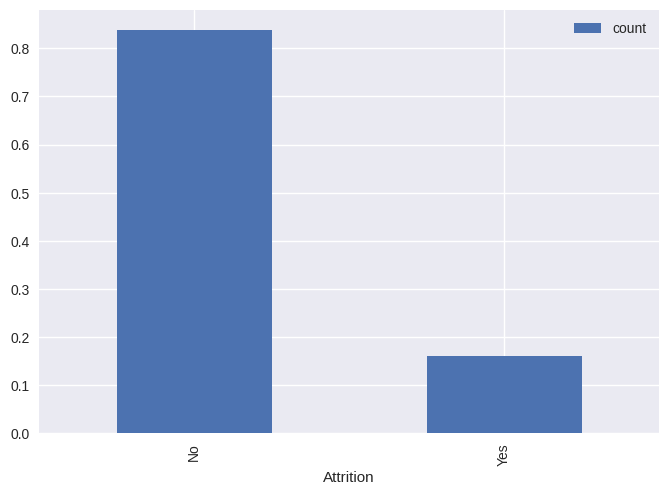

In [83]:
pd.DataFrame(Y_train.value_counts()/len(Y_train)).plot(kind = "bar")
plt.show()

In [84]:
Y_test.value_counts()/len(Y_test)

,count
Attrition,
No,0.839002
Yes,0.160998


In [85]:
pipelines = {
    "clf": make_pipeline(DecisionTreeClassifier(max_depth=3,random_state=100))
}

In [86]:
scores = cross_validate(pipelines['clf'], X_train, Y_train,return_train_score=True)

In [87]:
scores['test_score'].mean()

np.float64(0.8396590101823348)

In [88]:
decisiontree_hyperparameters = {
    "decisiontreeclassifier__max_depth": np.arange(3,12),
    "decisiontreeclassifier__max_features": np.arange(3,10),
    "decisiontreeclassifier__min_samples_split": [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}

In [89]:
pipelines['clf']

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=100))])

In [98]:
clf_model = GridSearchCV(pipelines['clf'], decisiontree_hyperparameters, cv=5, n_jobs=-1)

In [99]:
clf_model.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=3,
                                                               random_state=100))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'decisiontreeclassifier__max_features': array([3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeclassifier__min_samples_leaf': array([1, 2]),
                         'decisiontreeclassifier__min_samples_split': [2, 3, 4,
                                                                       5, 6, 7,
                                                                       8, 9, 10,
                                                                       11, 12,
                                                                       13, 14,
                                                                       15]})

In [100]:
clf_model.best_params_

{'decisiontreeclassifier__max_depth': np.int64(3),
 'decisiontreeclassifier__max_features': np.int64(7),
 'decisiontreeclassifier__min_samples_leaf': np.int64(1),
 'decisiontreeclassifier__min_samples_split': 10}

In [101]:
clf_model.best_score_

np.float64(0.8561780724603363)

In [102]:
clf_model.best_estimator_.named_steps['decisiontreeclassifier']


DecisionTreeClassifier(max_depth=np.int64(3), max_features=np.int64(7),
                       min_samples_leaf=np.int64(1), min_samples_split=10,
                       random_state=100)

In [103]:
clf_best_model = clf_model.best_estimator_.named_steps['decisiontreeclassifier']

In [105]:
#Making a dataframe of actual and predicted data from test set

tree_test_pred = pd.concat([Y_test.reset_index(drop = True),pd.DataFrame(clf_model.predict(X_test))],axis=1)
tree_test_pred.columns = ["actual","predicted"]

#setting the index to original index
tree_test_pred.index = Y_test.index

In [106]:
tree_test_pred.head()

,actual,predicted
34,Yes,Yes
1432,No,No
334,No,No
1068,Yes,No
736,No,No


In [107]:
#keeping only positive condition (yes for attrition)

pred_probability = pd.DataFrame(p[1] for p in clf_model.predict_proba(X_test))
pred_probability.columns = ["predicted_prob"]
pred_probability.index = Y_test.index

In [108]:
tree_test_pred = pd.concat([tree_test_pred,pred_probability],axis=1)

In [109]:
tree_test_pred.head()

,actual,predicted,predicted_prob
34,Yes,Yes,0.632184
1432,No,No,0.220859
334,No,No,0.072165
1068,Yes,No,0.145985
736,No,No,0.072165


In [110]:
tree_test_pred["actual_left"] = np.where(tree_test_pred["actual"] == "Yes",1,0)
tree_test_pred["predicted_left"] = np.where(tree_test_pred["predicted"] == "Yes",1,0)

In [111]:
tree_test_pred.head()

,actual,predicted,predicted_prob,actual_left,predicted_left
34,Yes,Yes,0.632184,1,1
1432,No,No,0.220859,0,0
334,No,No,0.072165,0,0
1068,Yes,No,0.145985,1,0
736,No,No,0.072165,0,0


In [112]:
metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,labels=["Yes","No"])

array([[ 21,  50],
       [ 26, 344]])

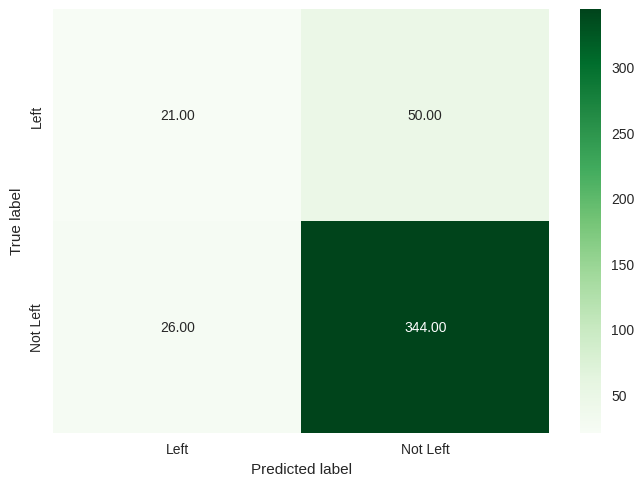

In [115]:
sns.heatmap(metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,
                                    labels=["Yes","No"]),cmap="Greens",annot=True,fmt=".2f",
           xticklabels = ["Left", "Not Left"] , yticklabels = ["Left", "Not Left"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [116]:
auc_score_test = metrics.roc_auc_score(tree_test_pred.actual_left,tree_test_pred.predicted_left)
print("AUROC Score:",round(auc_score_test,4))

AUROC Score: 0.6128


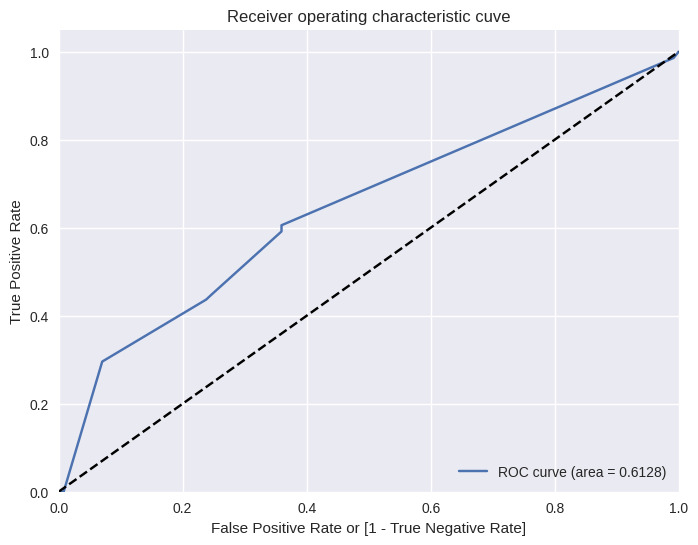

In [117]:
fpr, tpr, thresholds = metrics.roc_curve(tree_test_pred.actual_left, tree_test_pred.predicted_prob,drop_intermediate=False)


plt.figure(figsize=(8, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic cuve')
plt.legend(loc="lower right")
plt.show()

In [118]:
#calculating the recall score
print("Recall Score:",round(metrics.recall_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))

Recall Score: 29.577


In [119]:
#calculating the precision score
print("Precision Score:",round(metrics.precision_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))

Precision Score: 44.681


In [120]:
print(metrics.classification_report(tree_test_pred.actual_left,tree_test_pred.predicted_left))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       370
           1       0.45      0.30      0.36        71

    accuracy                           0.83       441
   macro avg       0.66      0.61      0.63       441
weighted avg       0.80      0.83      0.81       441



In [121]:
from sklearn.tree import export_graphviz

In [122]:
import pydotplus as pdot

In [124]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus as pdot

In [125]:
#write the dot data
dot_data = StringIO()

In [126]:
#export the decision tree along with the feature names into a dot file format

export_graphviz(clf_best_model,out_file=dot_data,filled=True,
                rounded=True,special_characters=True,feature_names = X_train.columns.values,class_names = ["No","Yes"])

In [127]:
#make a graph from dot file
graph = pdot.graph_from_dot_data(dot_data.getvalue())

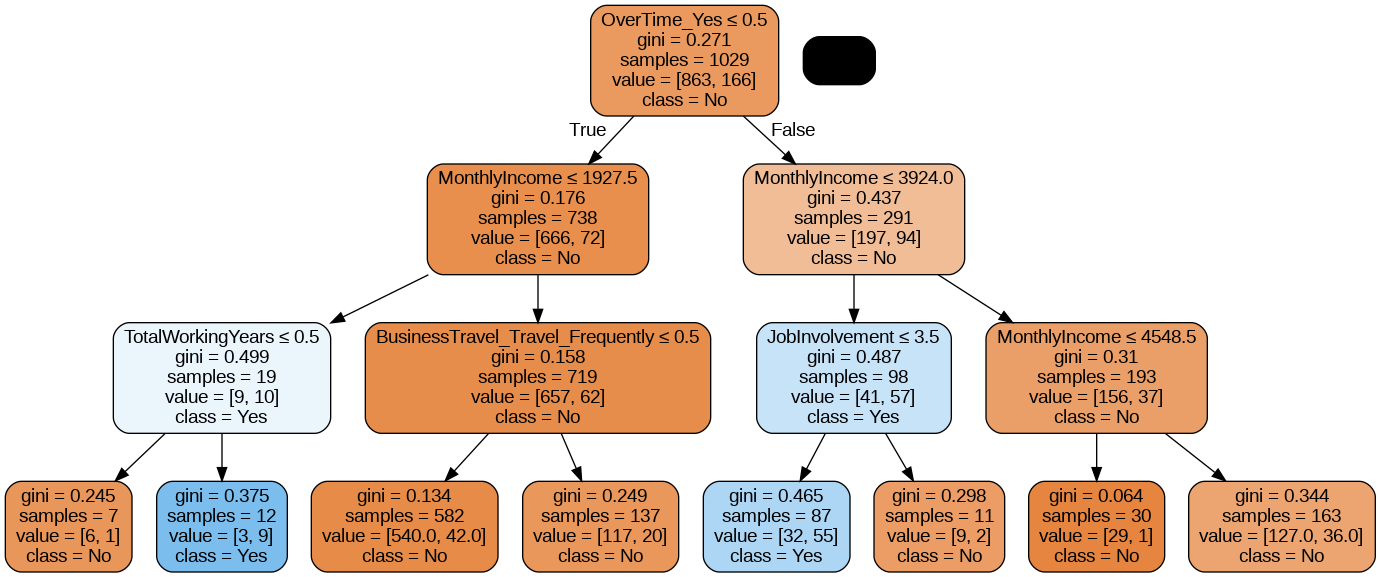

In [128]:
Image(graph.create_png())

In [129]:
graph.write_png("employee_attirtion.png")

True